In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import daily cost csv
df = pd.read_csv('cost_data/dailyCost7_14_2025_to_9_26_2025.csv')
# drop last combined row 
df = df.drop(df.index[-1])
# import hourly cost csv
df1 = pd.read_csv('cost_data/hourlyCost7_14_2025_to_9_26_2025.csv')
# convert usage date to pandas datetime
df['Usage date'] = pd.to_datetime(df['Usage date'])
# remove $ and covert to float
df['Total cost'] = df['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
# create a new column with the day of week
df['Day of week'] = df['Usage date'].dt.day_name()
print(df.dtypes)
df.head()

Meter read date                 object
Usage date              datetime64[ns]
Total cost                     float64
High temperature (F)           float64
Low temperature (F)            float64
Day of week                     object
dtype: object


,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,7/16/2025,2025-07-15,4.42,105.0,86.0,Tuesday
2,7/17/2025,2025-07-16,3.23,95.0,82.0,Wednesday
3,7/18/2025,2025-07-17,3.53,100.0,80.0,Thursday
4,7/19/2025,2025-07-18,5.17,106.0,86.0,Friday


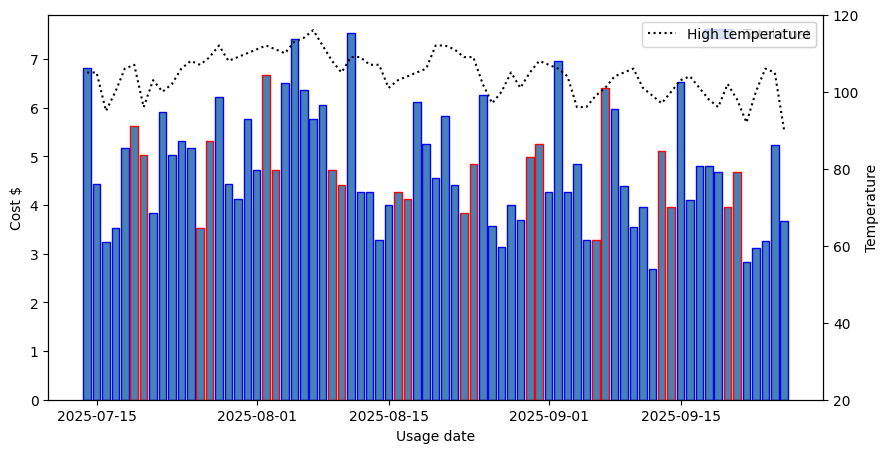

In [3]:
# create a list that assignes colors for the weekdays/weekends for Day of Week
colors = ['red' if day in ['Saturday', 'Sunday'] else 'blue' for day in df['Day of week']]
# initate figure and axis for plotting
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Usage date'], df['Total cost'], edgecolor = colors, color = 'steelblue', label = 'Total Cost')
# create a secondary axis on the same figure for the temperature
ax1 = ax.twinx()
ax1.plot(df['Usage date'], df['High temperature (F)'], 'k', ls = 'dotted', label = 'High temperature') 
ax.set_xlabel('Usage date')
ax.set_ylabel('Cost $')
#ax.set_ylim(0,8)
ax1.set_ylabel('Temperature')
ax1.set_ylim(20,120)
ax.legend()
ax1.legend()

mean    4.770267
max     7.530000
min     2.680000
std     1.139442
Name: Total cost, dtype: float64


<Axes: title={'center': 'Number of times above average usage'}, xlabel='Day of week'>

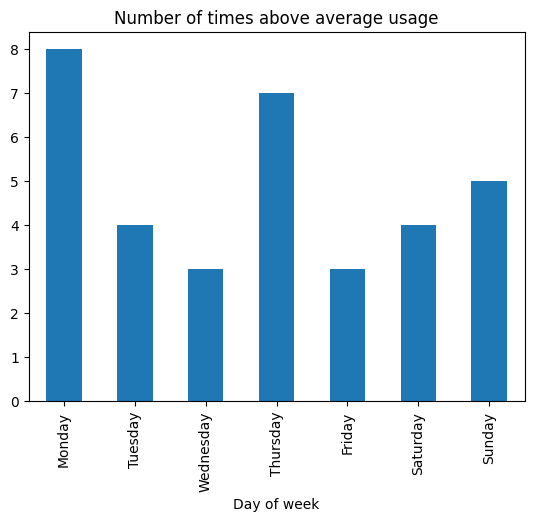

In [4]:
# get the mean, max, min, and standard deviation of the data set
stat = df['Total cost'].agg(['mean', 'max', 'min', 'std'])
print(stat)
# create a data frame that contains the days that have above average energy use
above_average = df[df['Total cost'].ge(stat['mean'])]
# Group and count the days of week that are above average energy use
day_groups = above_average.groupby('Day of week')['Day of week'].value_counts()
# create new index to sort the days of week chronologically
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_groups.index = pd.CategoricalIndex(day_groups.index, categories=days_order, ordered=True)
day_groups = day_groups.sort_index()
# bar graph of the days of week that are above average 
day_groups.plot(kind='bar', title='Number of times above average usage')

In [5]:
weekend_costs = df[df["Day of week"].isin(["Saturday", "Sunday"])]["Total cost"]
print(weekend_costs)

5     5.62
6     5.02
12    3.53
13    5.32
19    6.66
20    4.72
26    4.72
27    4.41
33    4.27
34    4.13
40    3.84
41    4.84
47    4.98
48    5.26
54    3.28
55    6.40
61    5.10
62    3.96
68    3.96
69    4.67
Name: Total cost, dtype: float64


,Usage date,Interval,Total cost,Datetime,Day of week
0,2025-07-14,12:0 AM,0.11,2025-07-14 00:00:00,Monday
1,2025-07-14,1:0 AM,0.11,2025-07-14 01:00:00,Monday
2,2025-07-14,2:0 AM,0.12,2025-07-14 02:00:00,Monday
3,2025-07-14,3:0 AM,0.11,2025-07-14 03:00:00,Monday
4,2025-07-14,4:0 AM,0.10,2025-07-14 04:00:00,Monday


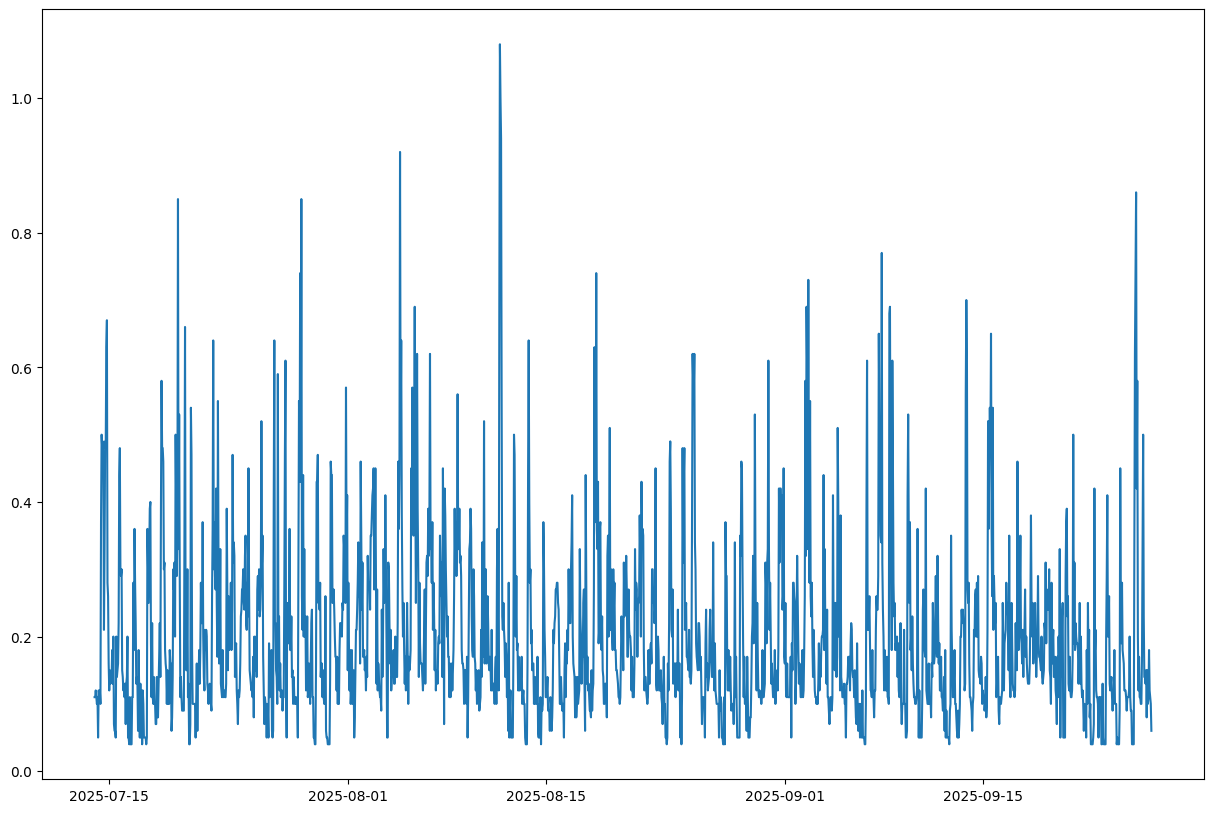

In [6]:
df1['Total cost'] = df1['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df1["Datetime"] = pd.to_datetime(df1["Usage date"] + " " + df1["Interval"], format="%m/%d/%Y %I:%M %p")
df1['Day of week'] = df1['Datetime'].dt.day_name()
df1['Usage date'] = pd.to_datetime(df1['Usage date'])

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df1['Datetime'], df1['Total cost'])
df1.head()

In [7]:
max = df.loc[df['Total cost'] == df['Total cost'].max()]
max_date = max['Usage date'].iloc[0]
print(max_date)

2025-08-11 00:00:00


<Axes: xlabel='Datetime'>

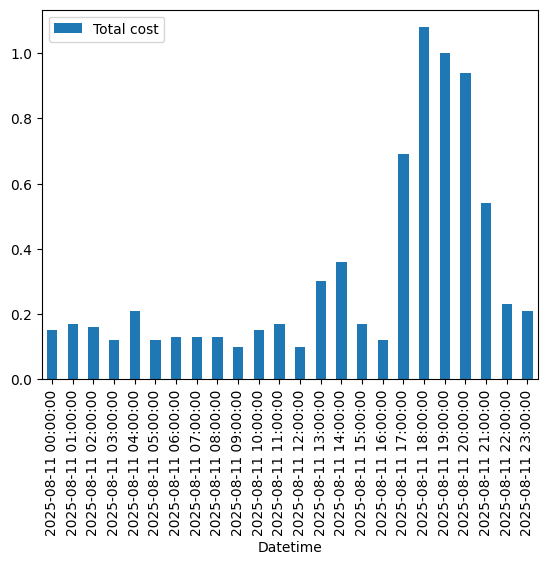

In [8]:
max_day = df1.loc[df1['Usage date'] == max_date]
max_day.plot.bar(x= 'Datetime', y='Total cost')

In [9]:
above_average1 = df[df['Total cost'].ge(stat['mean'] + 1)].reset_index()
above_average1

,index,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,8,7/23/2025,2025-07-22,5.91,100.0,84.0,Tuesday
2,14,7/29/2025,2025-07-28,6.21,112.0,82.0,Monday
3,19,8/3/2025,2025-08-02,6.66,112.0,89.0,Saturday
4,21,8/5/2025,2025-08-04,6.51,110.0,85.0,Monday
5,22,8/6/2025,2025-08-05,7.40,113.0,88.0,Tuesday
6,23,8/7/2025,2025-08-06,6.36,114.0,89.0,Wednesday
7,25,8/9/2025,2025-08-08,6.06,112.0,89.0,Friday
8,28,8/12/2025,2025-08-11,7.53,109.0,90.0,Monday
9,35,8/19/2025,2025-08-18,6.11,105.0,81.0,Monday


<Axes: xlabel='Datetime'>

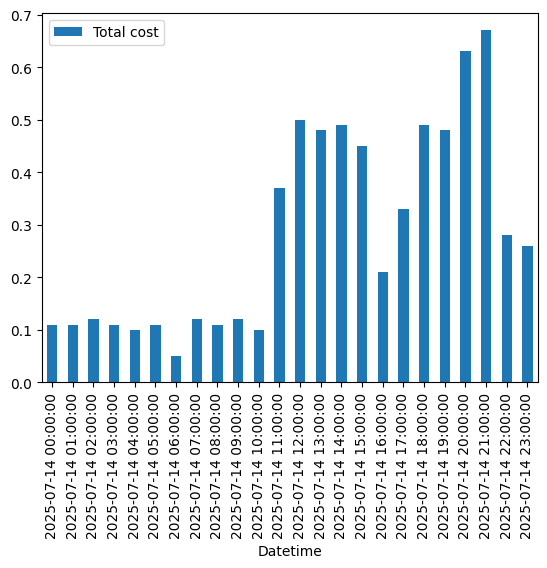

In [10]:
day0 = df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]
day0.plot.bar(x= 'Datetime', y='Total cost')


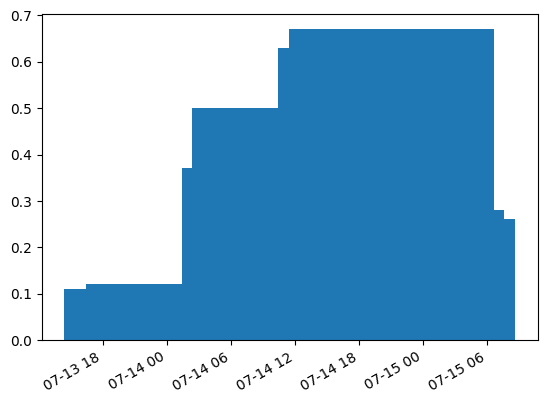

In [11]:
plt.bar(df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]['Datetime'],
        df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]['Total cost'])
plt.gcf().autofmt_xdate()

In [12]:
df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]['Datetime']
df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]['Total cost']

0     0.11
1     0.11
2     0.12
3     0.11
4     0.10
5     0.11
6     0.05
7     0.12
8     0.11
9     0.12
10    0.10
11    0.37
12    0.50
13    0.48
14    0.49
15    0.45
16    0.21
17    0.33
18    0.49
19    0.48
20    0.63
21    0.67
22    0.28
23    0.26
Name: Total cost, dtype: float64

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


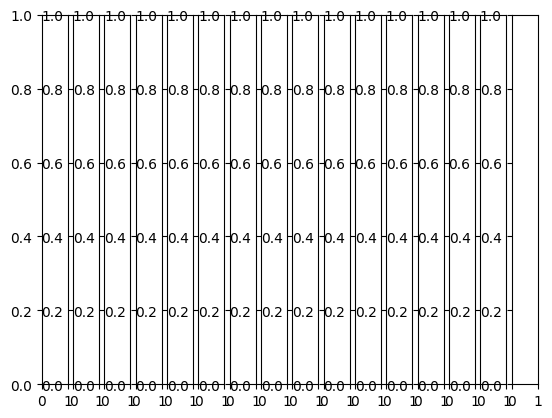

In [13]:
fix, ax = plt.subplots(1, (len(above_average1.index)))

for i, x in enumerate(ax):
    print(i)
